# Evaluation project-2 Avacodo Project

In [8]:
import numpy as np
import pandas as pd
import sklearn
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [194]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Understanding the Datasets:

There are 18249 rows and 14 columns in the dataset namely


Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Checking the null values

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes

    Unnamed: 0 
    type
    year
    region

7     432
11    432
1     432
2     432
3     432
4     432
5     432
6     432
8     432
9     432
10    432
0     432
43    324
18    324
20    324
14    324
35    324
19    324
30    324
50    324
34    324
46    324
27    324
49    324
33    324
17    324
15    324
48    324
32    324
16    324
36    324
45    324
21    324
24    324
12    324
42    324
26    324
28    324
41    324
25    324
44    324
40    324
13    324
39    324
23    324
31    324
38    324
22    324
29    324
37    324
47    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


<AxesSubplot:xlabel='Unnamed: 0', ylabel='count'>

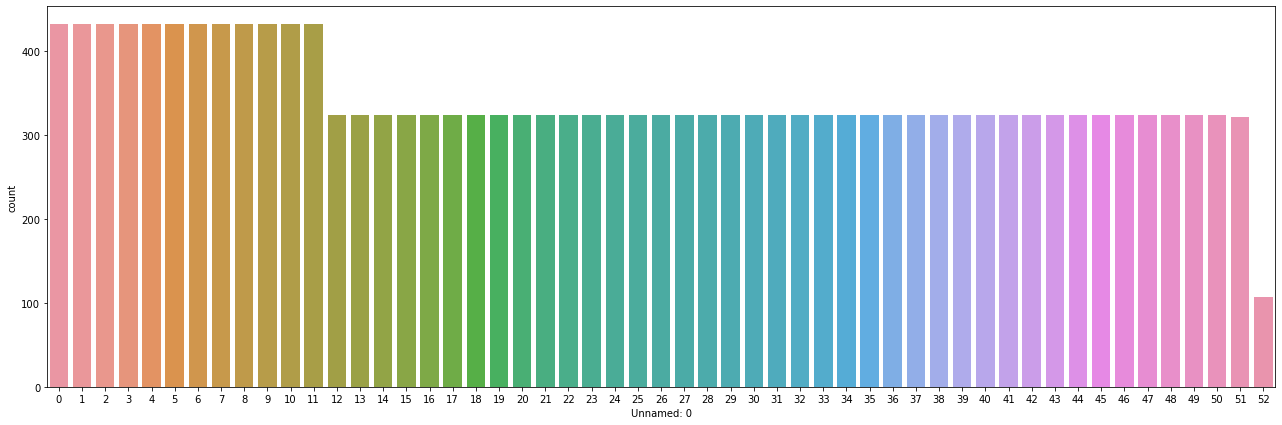

In [7]:
ax=df['Unnamed: 0'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Unnamed: 0'])

from the above obserations it is observed that it is showing the numbers or class to which thecolumn belongs

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

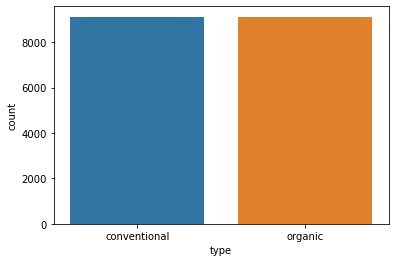

In [8]:
ax=df['type'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['type'])

from the above obserations it is observed that it is shows that there are two classes conventional, organic

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

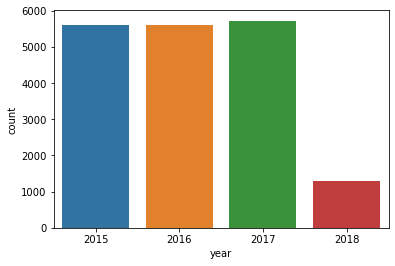

In [9]:
ax=df['year'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['year'])

from the above obserations it is observed that it is shows that there are 4 different years the avacodo purchase

Columbus               338
CincinnatiDayton       338
HartfordSpringfield    338
TotalUS                338
Louisville             338
Jacksonville           338
Indianapolis           338
BuffaloRochester       338
DallasFtWorth          338
Detroit                338
Chicago                338
Pittsburgh             338
Syracuse               338
Boise                  338
Albany                 338
Tampa                  338
Plains                 338
HarrisburgScranton     338
Spokane                338
NewYork                338
RaleighGreensboro      338
NorthernNewEngland     338
Orlando                338
Atlanta                338
Philadelphia           338
Charlotte              338
SouthCarolina          338
West                   338
Boston                 338
LosAngeles             338
Portland               338
RichmondNorfolk        338
Houston                338
Southeast              338
Northeast              338
StLouis                338
SouthCentral           338
M

<AxesSubplot:xlabel='region', ylabel='count'>

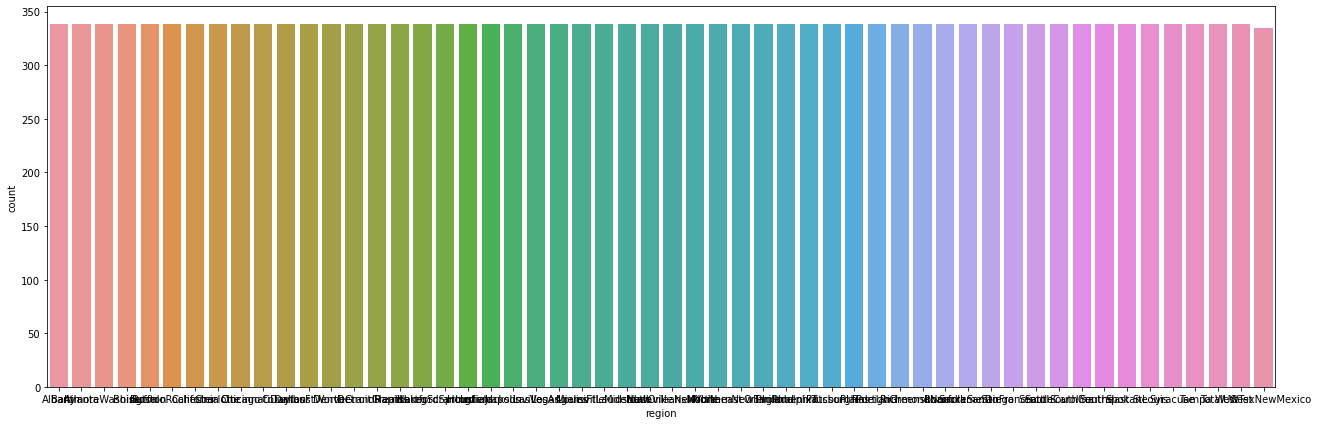

In [10]:
ax=df['region'].value_counts()
print(ax)

plt.figure(figsize=(22,7))
sns.countplot(df['region'])

from the above obserations it is observed that it is shows that in which different different countries the avacodo purchase

# Encoding of region column

In [11]:
lencoder=LabelEncoder()
df['region']=lencoder.fit_transform(df['region'])
df['type']=lencoder.fit_transform(df['type'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


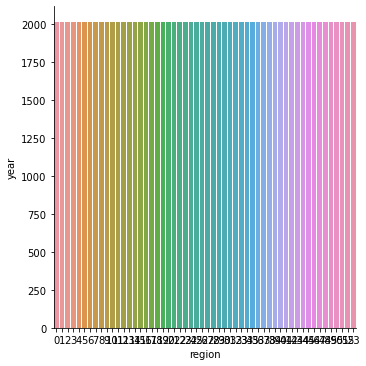

<Figure size 2304x720 with 0 Axes>

In [12]:
g=sns.catplot(x='region',y='year',data=df,kind='bar')
plt.figure(figsize=(32,10))
plt.show()

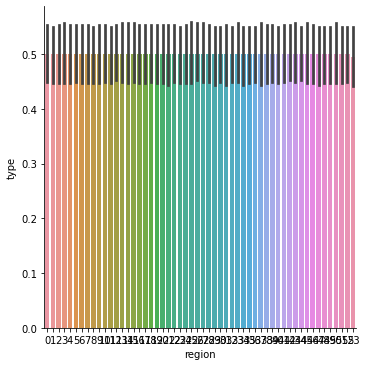

<Figure size 2304x720 with 0 Axes>

In [13]:
g=sns.catplot(x='region',y='type',data=df,kind='bar')
plt.figure(figsize=(32,10))
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

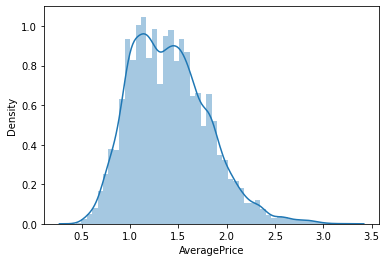

In [14]:
sns.distplot(df['AveragePrice'],kde=True)

from the above plot it observed that AveragePrice is varied from 0.2 to 3.2

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

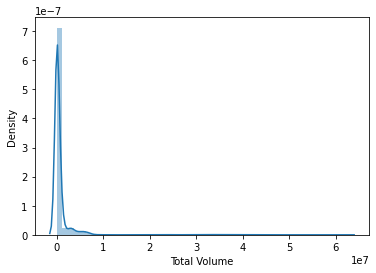

In [15]:
sns.distplot(df['Total Volume'],kde=True)

from the above plot it observed that Total Volume is varied from -0.2 to 6

<AxesSubplot:xlabel='4046', ylabel='Density'>

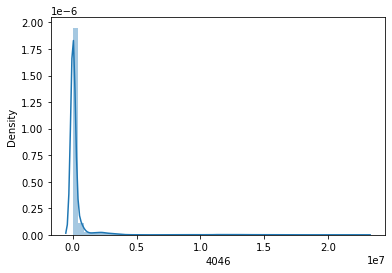

In [16]:
sns.distplot(df['4046'],kde=True)

from the above plot it observed that 4046 is varied from -0.2 to 2.4

<AxesSubplot:xlabel='4225', ylabel='Density'>

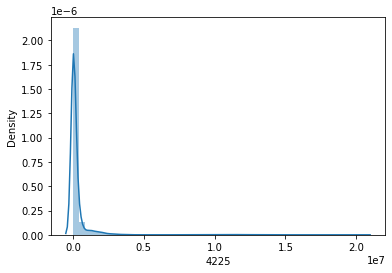

In [17]:
sns.distplot(df['4225'],kde=True)

from the above plot it observed that 4225 is varied from 0 to 2.2

<AxesSubplot:xlabel='4770', ylabel='Density'>

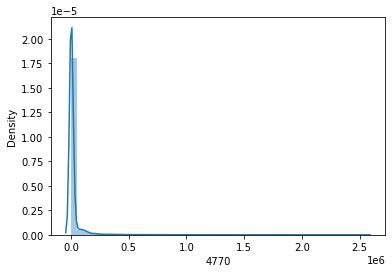

In [18]:
sns.distplot(df['4770'],kde=True)

from the above plot it observed that 4770 is varied from -0.2 to 2.7

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

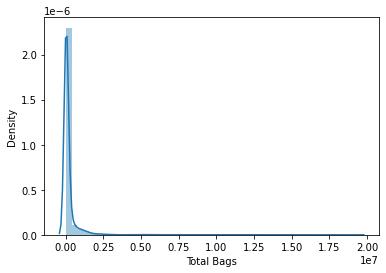

In [19]:
sns.distplot(df['Total Bags'],kde=True)

from the above plot it observed that Total Bags is varied from 0 to 1.8

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

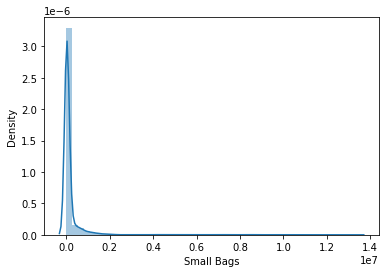

In [20]:
sns.distplot(df['Small Bags'],kde=True)

from the above plot it observed that Small Bags is varied from 0 to 1.4

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

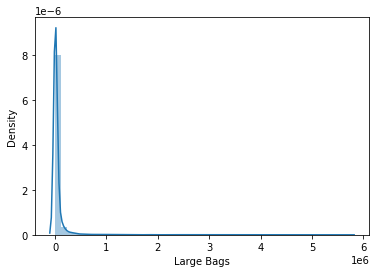

In [21]:
sns.distplot(df['Large Bags'],kde=True)

from the above plot it observed that Large Bags is varied from 0 to 5.7

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

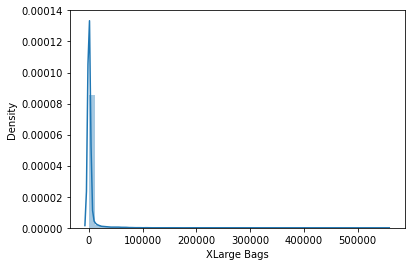

In [22]:
sns.distplot(df['XLarge Bags'],kde=True)

from the above plot it observed that Large Bags is varied from 0 to 100000

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

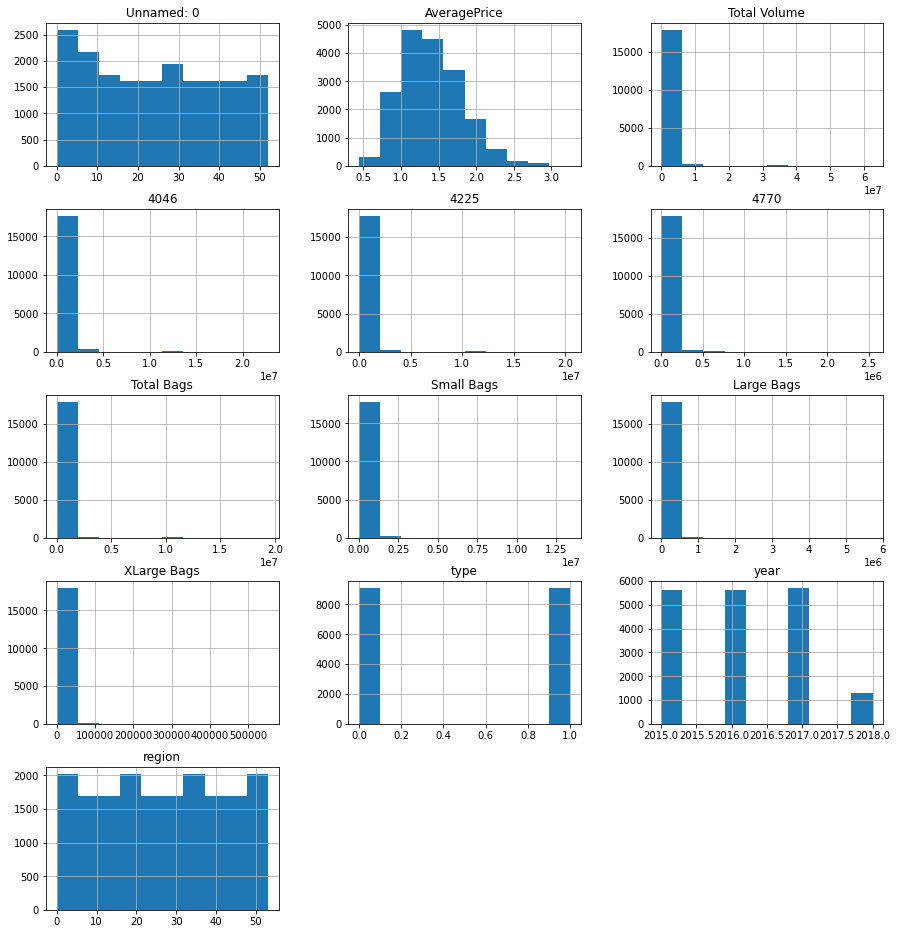

In [23]:
df.hist(figsize=(15,30),layout=(9,3))

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

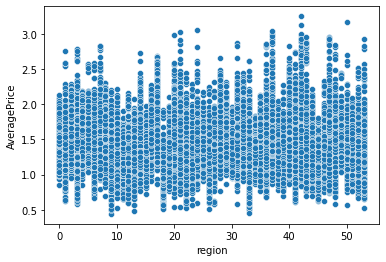

In [24]:
sns.scatterplot(x='region',y='AveragePrice',data=df)

AveragePrice data is scatter from 0 to 3 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

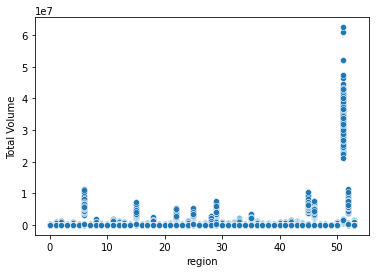

In [25]:
sns.scatterplot(x='region',y='Total Volume',data=df)

Total  Volume data is scatter from 0 to 6 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='4046'>

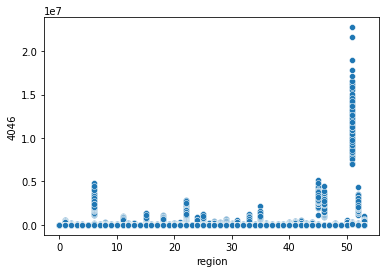

In [26]:
sns.scatterplot(x='region',y='4046',data=df)

4046 data is scatter from 0 to 3 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='4225'>

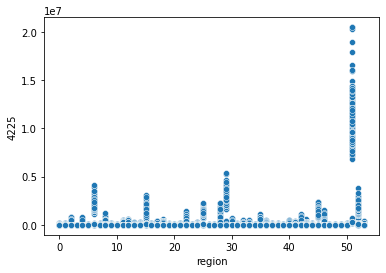

In [27]:
sns.scatterplot(x='region',y='4225',data=df)

4046 data is scatter from 0 to 2 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='4770'>

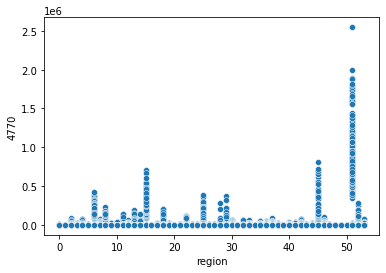

In [28]:
sns.scatterplot(x='region',y='4770',data=df)

4770 data is scatter from 0 to 2.5 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='Total Bags'>

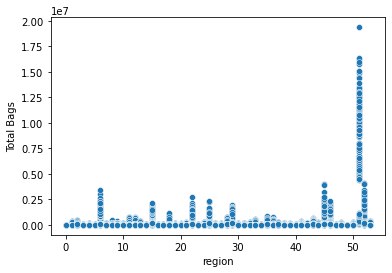

In [29]:
sns.scatterplot(x='region',y='Total Bags',data=df)

Total Bags data is scatter from 0 to 2 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='Small Bags'>

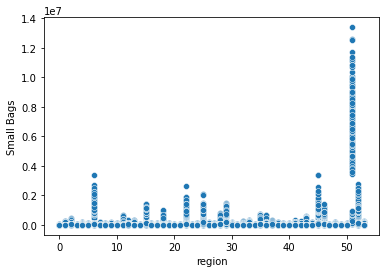

In [30]:
sns.scatterplot(x='region',y='Small Bags',data=df)

Small Bags data is scatter from 0 to 1.4 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='Large Bags'>

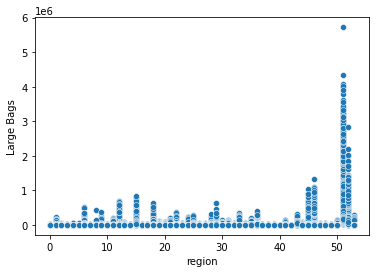

In [31]:
sns.scatterplot(x='region',y='Large Bags',data=df)

Large Bags data is scatter from 0 to 6 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='XLarge Bags'>

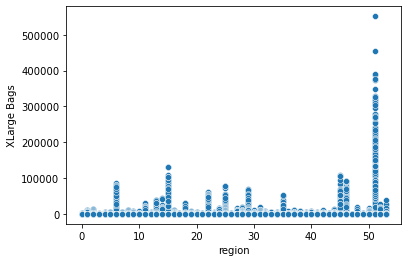

In [32]:
sns.scatterplot(x='region',y='XLarge Bags',data=df)

XLarge Bags data is scatter from 0 to 500000 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='type'>

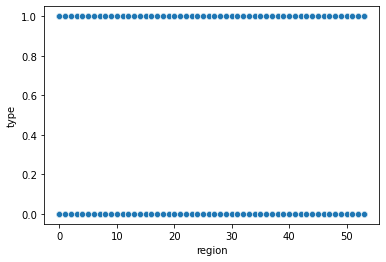

In [33]:
sns.scatterplot(x='region',y='type',data=df)

type of avacodo is scatter between 0 and 1 and region data is scatter from 0 to 55

<AxesSubplot:xlabel='region', ylabel='year'>

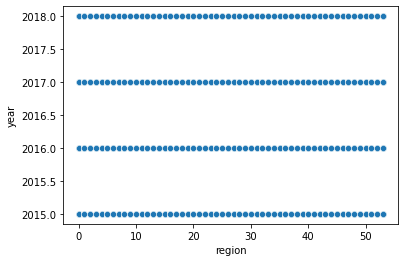

In [34]:
sns.scatterplot(x='region',y='year',data=df)

avocodo is sold in year 2015, 2016,2017 and 2018

# Describe the dataset

In [35]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


there is much more difference between 75% and maximum value , hence outliers are present

Here the Date column data is not seen we delete this column .
And we can drop the unnamed column as it is like indexing

In [196]:
df.drop(["Date"],axis=1,inplace=True)

In [197]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [198]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:>

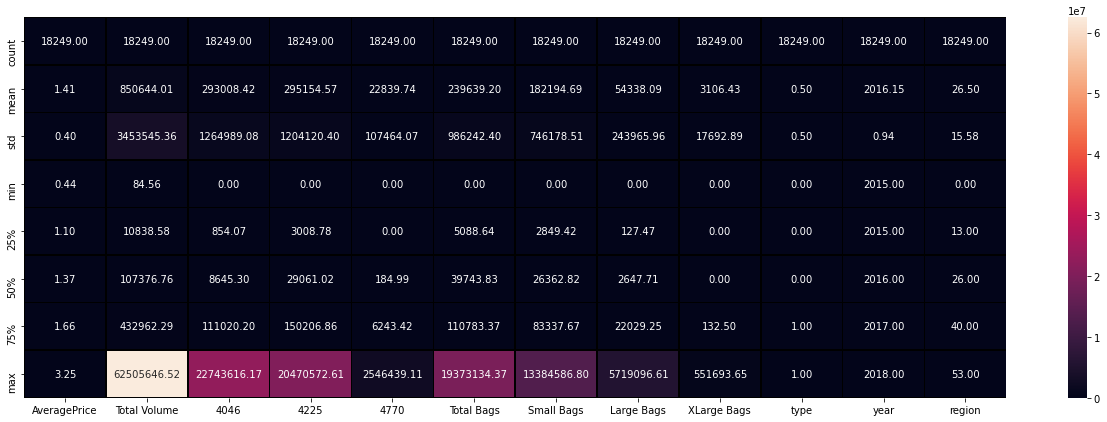

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


# Correlation

In [40]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


If we consider 'region' as target column then multi-collinearity is present in the following columns

Total Volume and Total Bags

4046 and Large Bags

If we consider 'AveragePrice' as target column then multi-collinearity is present in the following columns

4225, 4770, Total Bags, Small Bags, Large Bags


<AxesSubplot:>

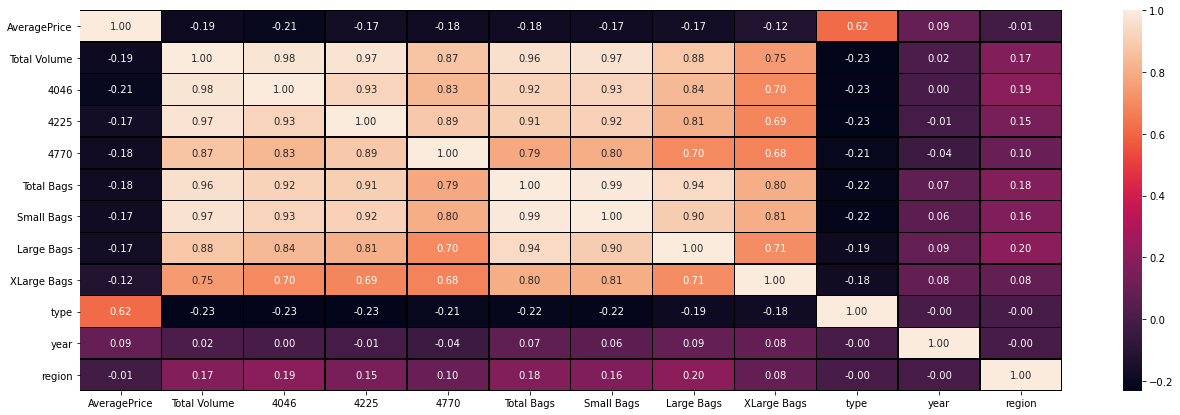

In [41]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


target column--->"region"

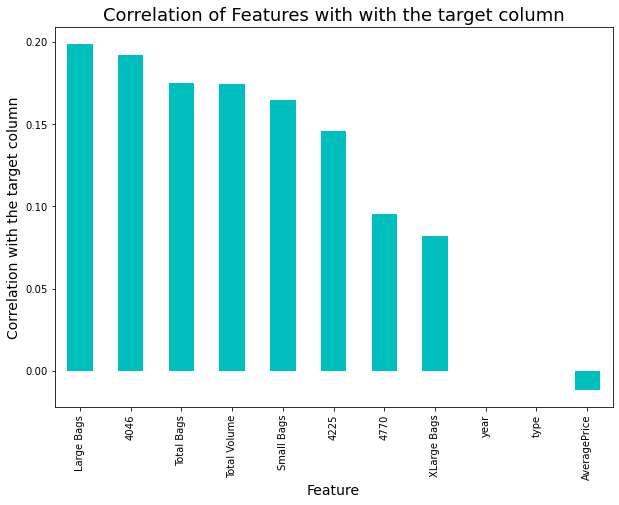

In [42]:
plt.figure(figsize=(10,7))
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()

target column--->"AveragePrice"

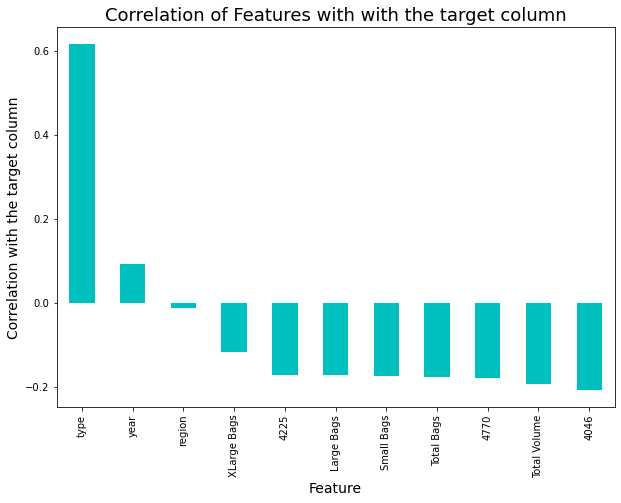

In [43]:
plt.figure(figsize=(10,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()

# When target column--->"region" Apply Vif to reduce multi-collinearity

In [86]:
dfx1=df.iloc[:,:-1]
dfx1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018


In [88]:
dfy1=df.iloc[:,11:]
dfy1

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [15]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [91]:
calc_vif(dfx1)

,variables,VIF_Factor
0,AveragePrice,2.192486e+01
1,Total Volume,5.211770e+09
2,4046,6.946117e+08
3,4225,6.332177e+08
4,4770,4.972739e+06
5,Total Bags,2.502000e+14
6,Small Bags,1.429714e+14
7,Large Bags,1.521486e+13
8,XLarge Bags,7.855435e+10
9,type,3.340699e+00


Now VIF factor is high for Total Bags so we drop this column.

In [92]:
df.drop(["Total Bags"],axis=1,inplace=True)

In [93]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


In [94]:
dfx2=df.iloc[:,:-1]
dfx2

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018


In [95]:
dfy2=df.iloc[:,10:]
dfy2

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [96]:
def calc_vif(dfx2):
    vif=pd.DataFrame()
    vif['variables']=dfx2.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx2.values,i) for i in range(dfx2.shape[1])]
    return(vif)

In [97]:
calc_vif(dfx2)

,variables,VIF_Factor
0,AveragePrice,2.192484e+01
1,Total Volume,5.211758e+09
2,4046,6.946101e+08
3,4225,6.332163e+08
4,4770,4.972728e+06
5,Small Bags,2.430655e+08
6,Large Bags,2.573677e+07
7,XLarge Bags,1.328936e+05
8,type,3.340569e+00
9,year,1.617324e+01


In [98]:
df.drop(["Total Volume"],axis=1,inplace=True)

In [99]:
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


In [100]:
dfx3=df.iloc[:,:-1]
dfx3

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018


In [101]:
dfy3=df.iloc[:,9:]
dfy3

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [102]:
def calc_vif(dfx3):
    vif=pd.DataFrame()
    vif['variables']=dfx3.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx3.values,i) for i in range(dfx3.shape[1])]
    return(vif)

In [103]:
calc_vif(dfx3)

,variables,VIF_Factor
0,AveragePrice,21.924327
1,4046,10.600832
2,4225,14.281346
3,4770,5.612162
4,Small Bags,20.495577
5,Large Bags,5.816163
6,XLarge Bags,3.518467
7,type,3.336196
8,year,16.173067


In [104]:
df.drop(["AveragePrice"],axis=1,inplace=True)

In [105]:
df.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


In [106]:
dfx4=df.iloc[:,:-1]
dfx4

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018


In [107]:
dfy4=df.iloc[:,8:]
dfy4

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [108]:
def calc_vif(dfx4):
    vif=pd.DataFrame()
    vif['variables']=dfx4.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx4.values,i) for i in range(dfx4.shape[1])]
    return(vif)

In [109]:
calc_vif(dfx4)

,variables,VIF_Factor
0,4046,10.445154
1,4225,14.108017
2,4770,5.585153
3,Small Bags,20.489796
4,Large Bags,5.805532
5,XLarge Bags,3.508795
6,type,2.116205
7,year,2.245785


After droping 3 columns we are not getting vif factor less than 5 so to remove multi collinearity we use PCA

In [110]:
df.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


In [111]:
df.shape

(18249, 9)

In [112]:
df.columns

Index(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

# Skewness

In [113]:
df.skew()

4046            8.648220
4225            8.942466
4770           10.159396
Small Bags      9.540660
Large Bags      9.796455
XLarge Bags    13.139751
type            0.000329
year            0.215339
region          0.000030
dtype: float64

From the above observation the columns falls under high skewness: 
    
    
    4046
    4225
    4770
    Total Bags       
    Small Bags       
    Large Bags       
    XLarge Bags
    
  But the columns have good correlation with the target column and hence dropping of such column should not be good approach.

we need to remove skewness before to this we have to check outliers.

# Data Transformation:

Now we use subplot and displot to check data are normalised or not.

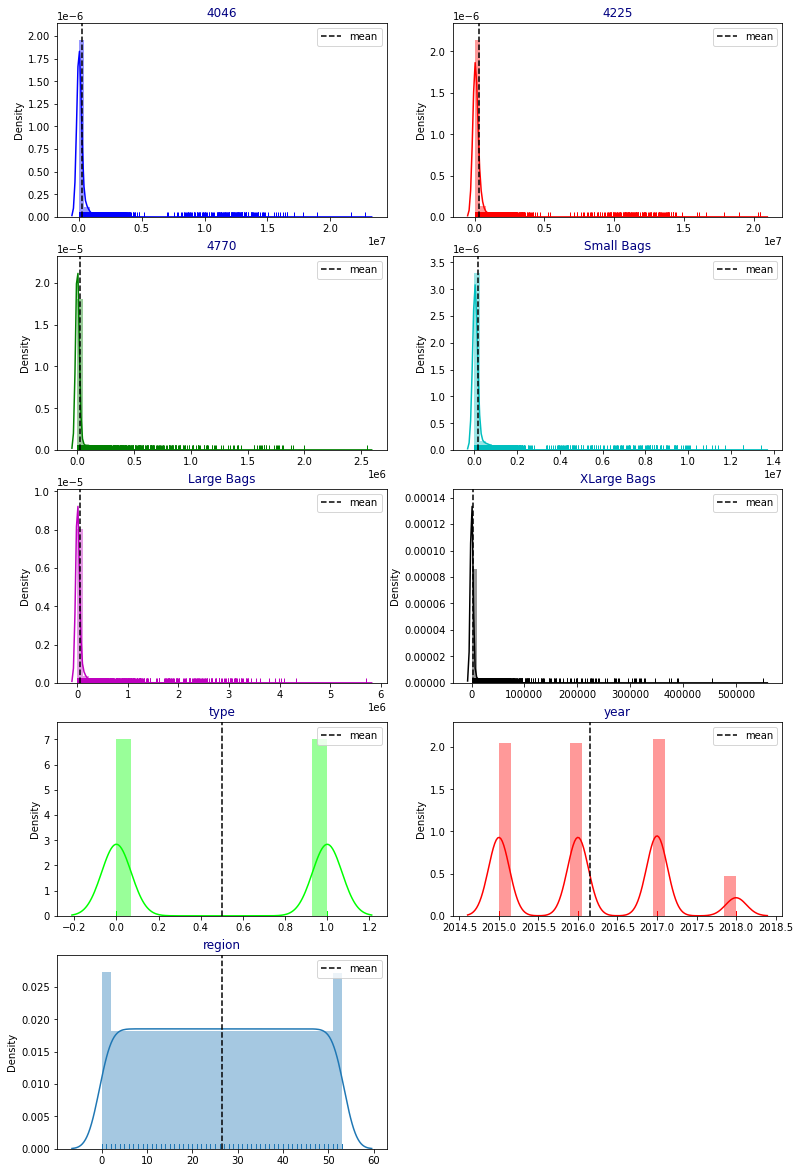

In [118]:
import itertools

cols = [ '4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","r"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

We need to transform those columns which has skewness

# Outliers Check:

<AxesSubplot:>

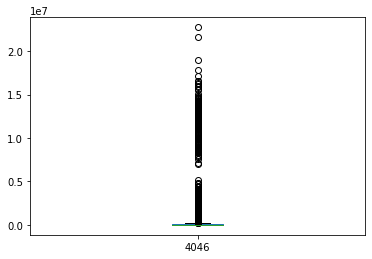

In [121]:
df['4046'].plot.box()

<AxesSubplot:>

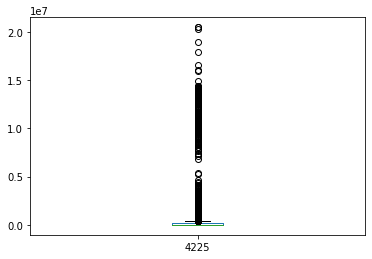

In [122]:
df['4225'].plot.box()

<AxesSubplot:>

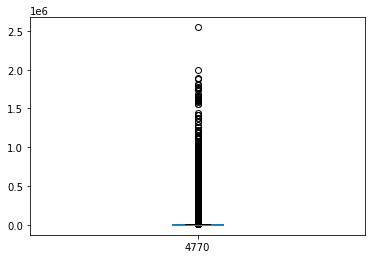

In [123]:
df['4770'].plot.box()

<AxesSubplot:>

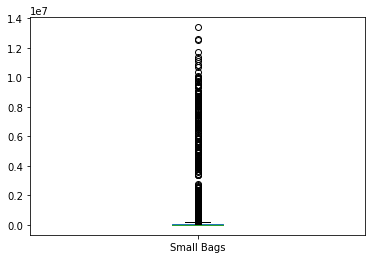

In [125]:
df['Small Bags'].plot.box()

<AxesSubplot:>

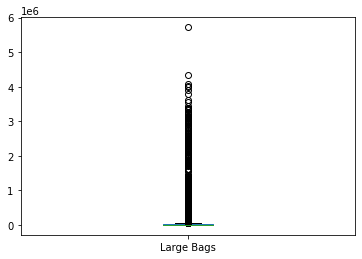

In [126]:
df['Large Bags'].plot.box()

<AxesSubplot:>

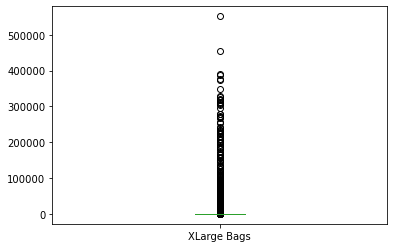

In [127]:
df['XLarge Bags'].plot.box()

<AxesSubplot:>

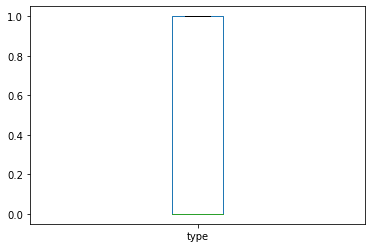

In [128]:
df['type'].plot.box()

<AxesSubplot:>

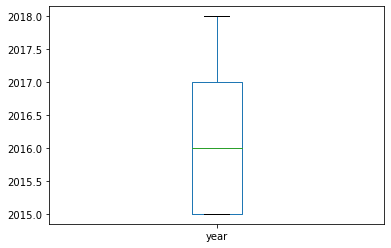

In [129]:
df['year'].plot.box()

<AxesSubplot:>

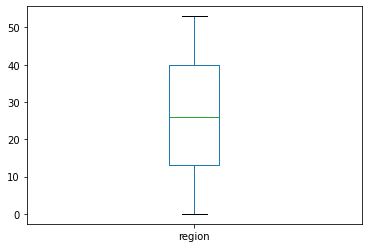

In [130]:
df['region'].plot.box()

from the above plot it is observed that some outliers are present. So we need this outliers.

# Check the percentage of data falls under outliers:

In [131]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([0, 0, 5, ..., 4, 4, 4], dtype=int64))

In [132]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


In [133]:
df_new.shape

(17782, 9)

In [134]:
df.shape

(18249, 9)

# Percentage loss of data

In [135]:
percentage_loss=((18249-17782)/18249)*100
print(percentage_loss)

2.55904433119623


Since the percentage of outliers are less than 5 percent.

So e can proceed with it.

# Target column= region --> we performs classification on input feature

In [137]:
y=df_new.iloc[:,8:]
y

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [138]:
x=df_new.iloc[:,:-1]
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018


# Removing skewness by transforming data.

In [139]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [140]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(x)

# Classification model buliding

In [142]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 17 The model performs very well
At random state:- 17
Training score is:- 3.971880492091388
Testing score is:- 4.0202417767781835
At random state 33 The model performs very well
At random state:- 33
Training score is:- 5.778558875219684
Testing score is:- 5.763283666010683
At random state 46 The model performs very well
At random state:- 46
Training score is:- 4.253075571177504
Testing score is:- 4.273263986505482
At random state 75 The model performs very well
At random state:- 75
Training score is:- 4.098418277680141
Testing score is:- 4.10458251335395
At random state 113 The model performs very well
At random state:- 113
Training score is:- 4.899824253075572
Testing score is:- 4.863649142535845
At random state 177 The model performs very well
At random state:- 177
Training score is:- 4.4007029876977155
Testing score is:- 4.357604723081248
At random state 196 The model performs very well
At random state:- 196
Training score is:- 4.203866432337434
Testing score is:- 4.2

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=331,test_size=0.20)

In [144]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.04835535563677256
[[27  0  3 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 [ 9  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [19  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.05      0.36      0.08        74
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        61
           5       0.00      0.02      0.01        66
           6       0.00      0.00      0.00        57
           7       0.12      0.25      0.16        61
           8       0.05      0.02      0.02        64
           9       0.00      0.00      0.00        85
          10       0.00      0.00      0.00        78
          11       0.00      0.00      0.00        67
          12       0.09      0.36      0.14        66
          13       0.00      0.00      0.00        58
          14 

# Cross-validation for MultinomialNB

In [145]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 0.3880328421999775
accuracy_score is :- 4.835535563677256


At cv:- 3
Cross validation score is:- 2.924314350615044
accuracy_score is :- 4.835535563677256


At cv:- 4
Cross validation score is:- 2.69928936008505
accuracy_score is :- 4.835535563677256


At cv:- 5
Cross validation score is:- 3.222322118366073
accuracy_score is :- 4.835535563677256


At cv:- 6
Cross validation score is:- 3.1322603153695394
accuracy_score is :- 4.835535563677256


At cv:- 7
Cross validation score is:- 3.756550059341756
accuracy_score is :- 4.835535563677256


At cv:- 8
Cross validation score is:- 3.6214502017003323
accuracy_score is :- 4.835535563677256


At cv:- 9
Cross validation score is:- 3.7057944276465262
accuracy_score is :- 4.835535563677256




In [146]:

print("At cv:-",5)
print("Cross validation score is:-",3.222 )
print("Accuracy_score is :-",4.835)

At cv:- 5
Cross validation score is:- 3.222
Accuracy_score is :- 4.835


# Auc Roc Curve

In [ ]:
svc=SVC(kernel='rbf')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)

In [149]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    pred_train=dtc.predict(x_train)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [150]:
svmkernel('rbf')

0.7121169524880517
[[53  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  1  2 ...  0  0 31]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        55
           1       0.47      0.62      0.53        69
           2       0.80      0.89      0.84        62
           3       0.77      0.75      0.76        65
           4       0.92      0.75      0.83        76
           5       0.86      0.54      0.67        70
           6       0.96      0.90      0.93        50
           7       0.80      0.63      0.70        75
           8       0.90      0.92      0.91        60
           9       0.64      0.88      0.74        72
          10       0.58      0.70      0.64        74
          11       0.76      0.74      0.75        61
          12       0.85      0.88      0.87        69
          13       0.57      0.44      0.50        72
          14  

# Cross-validation for SVM for rbf kernel

In [151]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 5.2974918456866495
accuracy_score is :- 73.1515321900478


At cv:- 3
Cross validation score is:- 41.32857606046758
accuracy_score is :- 73.1515321900478


At cv:- 4
Cross validation score is:- 45.78760524367652
accuracy_score is :- 73.1515321900478


At cv:- 5
Cross validation score is:- 53.93661731979875
accuracy_score is :- 73.1515321900478


At cv:- 6
Cross validation score is:- 54.971650278460594
accuracy_score is :- 73.1515321900478


At cv:- 7
Cross validation score is:- 60.47109739971995
accuracy_score is :- 73.1515321900478


At cv:- 8
Cross validation score is:- 62.03430818790381
accuracy_score is :- 73.1515321900478


At cv:- 9
Cross validation score is:- 61.9104500133814
accuracy_score is :- 73.1515321900478




In [152]:
print("At cv:-",8)
print("Cross validation score is:-",62.034)
print("Accuracy_score is :-",73.151)

At cv:- 8
Cross validation score is:- 62.034
Accuracy_score is :- 73.151


In [ ]:

svc=SVC(kernel='linear')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)

print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.019398369412426203
0.019472759226713533
[[0 3 1 ... 1 1 0]
 [0 3 3 ... 1 1 0]
 [2 4 0 ... 1 1 0]
 ...
 [0 2 0 ... 2 0 0]
 [0 0 2 ... 0 1 0]
 [0 3 1 ... 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.03      0.04      0.03        69
           2       0.00      0.00      0.00        62
           3       0.04      0.05      0.04        65
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00        70
           6       0.02      0.02      0.02        50
           7       0.06      0.04      0.05        75
           8       0.00      0.00      0.00        60
           9       0.02      0.03      0.02        72
          10       0.02      0.01      0.01        74
          11       0.01      0.02      0.01        61
          12       0.02      0.01      0.01        69
          13       0.01      0.01      0.01        72
          14       0.03    

# Cross-validation for SVM for linear kernel

In [156]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,5):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 4.858846024069284
accuracy_score is :- 53.83750351419736


At cv:- 3
Cross validation score is:- 33.08988745283845
accuracy_score is :- 53.83750351419736


At cv:- 4
Cross validation score is:- 38.206970080156985
accuracy_score is :- 53.83750351419736




In [157]:
print("At cv:-",4)
print("Cross validation score is:-",38.206)
print("Accuracy_score is :-", 53.837)

At cv:- 4
Cross validation score is:- 38.206
Accuracy_score is :- 53.837


In [158]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())



print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [159]:
svcr = SVC(C=10, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,x,y,cv=3)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 83.69412426201855
Cross Val Score: 47.06473558448908


In [ ]:
dtc=DecisionTreeClassifier()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [162]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)

In [163]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7905538375035142
1.0
[[47  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  2]
 [ 0  0 56 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  1  0 ...  0 45  0]
 [ 0  1  1 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        55
           1       0.75      0.71      0.73        69
           2       0.84      0.90      0.87        62
           3       0.80      0.92      0.86        65
           4       0.84      0.78      0.81        76
           5       0.77      0.70      0.73        70
           6       0.98      0.92      0.95        50
           7       0.86      0.83      0.84        75
           8       0.88      0.88      0.88        60
           9       0.77      0.83      0.80        72
          10       0.71      0.70      0.71        74
          11       0.81      0.84      0.82        61
          12       0.89      0.78      0.83        69
          13       0.75      0.67      0.71        72
          

# Cross validation of DTC model

In [165]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,8):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 2.9636711281070744
accuracy_score is :- 79.05538375035141


At cv:- 3
Cross validation score is:- 46.012810228753324
accuracy_score is :- 79.05538375035141


At cv:- 4
Cross validation score is:- 48.565506993812015
accuracy_score is :- 79.05538375035141


At cv:- 5
Cross validation score is:- 53.84074495607925
accuracy_score is :- 79.05538375035141


At cv:- 6
Cross validation score is:- 55.072500485444344
accuracy_score is :- 79.05538375035141


At cv:- 7
Cross validation score is:- 60.69588335106282
accuracy_score is :- 79.05538375035141




In [166]:
print("At cv:-",7)
print("Cross validation score is:-",60.695)
print("Accuracy_score is :-", 79.055)

At cv:- 7
Cross validation score is:- 60.695
Accuracy_score is :- 79.055


In [167]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy score:  0.6560977411735538


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)

In [170]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

1.0
0.843407365757661
[[52  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  1]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  1 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        55
           1       0.75      0.78      0.77        69
           2       0.87      0.94      0.90        62
           3       0.87      0.82      0.84        65
           4       0.89      0.83      0.86        76
           5       0.87      0.66      0.75        70
           6       0.94      0.98      0.96        50
           7       0.95      0.95      0.95        75
           8       0.94      1.00      0.97        60
           9       0.85      0.88      0.86        72
          10       0.76      0.68      0.71        74
          11       0.83      0.93      0.88        61
          12       0.94      0.86      0.89        69
          13       0.77      0.71      0.74        72
          1

In [173]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 4.03779102463165
accuracy_score is :- 83.1037391059882


At cv:- 3
Cross validation score is:- 45.79892629784739
accuracy_score is :- 83.1037391059882


At cv:- 4
Cross validation score is:- 44.96625295319867
accuracy_score is :- 83.1037391059882


At cv:- 5
Cross validation score is:- 49.06046095517228
accuracy_score is :- 83.1037391059882


At cv:- 6
Cross validation score is:- 44.89995937297748
accuracy_score is :- 83.1037391059882


At cv:- 7
Cross validation score is:- 55.12382971018825
accuracy_score is :- 83.1037391059882


At cv:- 8
Cross validation score is:- 58.09792264651566
accuracy_score is :- 83.1037391059882


At cv:- 9
Cross validation score is:- 60.80252765962294
accuracy_score is :- 83.1037391059882




In [174]:
print("At cv:-",9)
print("Cross validation score is:-",60.802)
print("Accuracy_score is :-", 83.103)

At cv:- 9
Cross validation score is:- 60.802
Accuracy_score is :- 83.103


In [178]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.8976449912126537
testing Accuracy= 0.01771155468091088
[[1 3 0 ... 1 1 1]
 [2 0 2 ... 1 1 1]
 [0 5 2 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [2 1 1 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.01      0.02      0.01        58
           1       0.00      0.00      0.00        56
           2       0.03      0.03      0.03        71
           3       0.03      0.03      0.03        76
           4       0.04      0.04      0.04        71
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00        60
           7       0.03      0.03      0.03        74
           8       0.00      0.00      0.00        82
           9       0.02      0.01      0.02        67
          10       0.02      0.02      0.02        62
          11       0.01      0.02      0.02        59
          12       0.04      0.04      0.04        68
          13       0.01      0.02      0.02    

In [180]:
rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

rfcs= accuracy_score(y_test,pred_rf)
for j in range(2,10):
    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 6.20852547519964
accuracy_score is :- 89.2887264548777


At cv:- 3
Cross validation score is:- 57.36136470254646
accuracy_score is :- 89.2887264548777


At cv:- 4
Cross validation score is:- 62.67488325092967
accuracy_score is :- 89.2887264548777


At cv:- 5
Cross validation score is:- 67.94460644626338
accuracy_score is :- 89.2887264548777


At cv:- 6
Cross validation score is:- 68.77173397680707
accuracy_score is :- 89.2887264548777


At cv:- 7
Cross validation score is:- 75.39593191346951
accuracy_score is :- 89.2887264548777


At cv:- 8
Cross validation score is:- 75.48011886208863
accuracy_score is :- 89.2887264548777


At cv:- 9
Cross validation score is:- 76.12130659332526
accuracy_score is :- 89.2887264548777




In [181]:
print("At cv:-",9)
print("Cross validation score is:-",76.121)
print("Accuracy_score is :-", 89.288)

At cv:- 9
Cross validation score is:- 76.121
Accuracy_score is :- 89.288


In [182]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.8976449912126537
testing Accuracy= 0.01771155468091088
[[1 3 0 ... 1 1 1]
 [2 0 2 ... 1 1 1]
 [0 5 2 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [2 1 1 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.01      0.02      0.01        58
           1       0.00      0.00      0.00        56
           2       0.03      0.03      0.03        71
           3       0.03      0.03      0.03        76
           4       0.04      0.04      0.04        71
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00        60
           7       0.03      0.03      0.03        74
           8       0.00      0.00      0.00        82
           9       0.02      0.01      0.02        67
          10       0.02      0.02      0.02        62
          11       0.01      0.02      0.02        59
          12       0.04      0.04      0.04        68
          13       0.01      0.02      0.02    

In [184]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)

adcs= accuracy_score(y_test,pred_ad)
for j in range(2,6):
    adscore = cross_val_score(ad,x,y,cv=j)
    adc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",adcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 76.12130659332526
accuracy_score is :- 5.088557773404554


At cv:- 3
Cross validation score is:- 76.12130659332526
accuracy_score is :- 5.088557773404554


At cv:- 4
Cross validation score is:- 76.12130659332526
accuracy_score is :- 5.088557773404554


At cv:- 5
Cross validation score is:- 76.12130659332526
accuracy_score is :- 5.088557773404554




In [185]:
print("At cv:-",5)
print("Cross validation score is:-",76.121)
print("Accuracy_score is :-", 5.088)

At cv:- 5
Cross validation score is:- 76.121
Accuracy_score is :- 5.088


In [186]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')
mnb_f1=f1_score(y_true, pred_mnb, average='macro')
rf_f1=f1_score(y_true, pred_rf, average='macro')
ad_f1=f1_score(y_true, pred_ad, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.017327356035923096
knn f1 score 0.8318950591340943
svcr f1 score 0.020457118835205443
mnb f1 score 0.007679716134692804
rf f1 score 0.8942243098849159
ad f1 score 0.02007068260754413


# The best model is Random Forest Classifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.The best model is SVM classifier with rbf kernel. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

# Model Saving

In [187]:
import pickle
filename = 'inhouse_avocado_classifier.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [188]:
import numpy as np
a=np.array(y_test)
a

array([[ 1],
       [49],
       [10],
       ...,
       [31],
       [14],
       [38]])

In [190]:
predicted=np.array(rf.predict(x_test))
predicted

array([ 1, 49, 10, ..., 50, 14, 38])

# From the above table the model is predicted the values with 89 percent accuracy

In [3]:
import pandas as pd
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.drop(["Date"],axis=1,inplace=True)

# When target column--->"AveragePrice" Apply Vif to reduce multi-collinearity

In [5]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
lencoder=LabelEncoder()
df['region']=lencoder.fit_transform(df['region'])
df['type']=lencoder.fit_transform(df['type'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [10]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


If we consider 'AveragePrice' as target column then multi-collinearity is present in the following columns

4225, 4770, Total Bags, Small Bags, Large Bags

In [11]:
dfx1=df.iloc[:,1:12]
dfx1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [12]:
dfy1=df.iloc[:,0:1]
dfy1

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


In [13]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [16]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Total Volume,5.212294e+09
1,4046,6.946814e+08
2,4225,6.332813e+08
3,4770,4.973250e+06
4,Total Bags,2.502000e+14
5,Small Bags,1.429714e+14
6,Large Bags,1.521486e+13
7,XLarge Bags,7.855572e+10
8,type,2.123029e+00
9,year,5.050744e+00


In [17]:
df.drop(["Total Bags"],axis=1,inplace=True)

In [18]:
dfx2=df.iloc[:,1:11]
dfx2

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53


In [19]:
def calc_vif(dfx2):
    vif=pd.DataFrame()
    vif['variables']=dfx2.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx2.values,i) for i in range(dfx2.shape[1])]
    return(vif)

In [20]:
calc_vif(dfx2)

,variables,VIF_Factor
0,Total Volume,5.212282e+09
1,4046,6.946800e+08
2,4225,6.332800e+08
3,4770,4.973240e+06
4,Small Bags,2.430901e+08
5,Large Bags,2.573934e+07
6,XLarge Bags,1.329073e+05
7,type,2.122919e+00
8,year,5.050588e+00
9,region,4.160317e+00


In [21]:
df.drop(["Total Volume"],axis=1,inplace=True)

In [25]:
dfx3=df.iloc[:,1:10]
dfx3

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53


In [26]:
def calc_vif(dfx3):
    vif=pd.DataFrame()
    vif['variables']=dfx3.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx3.values,i) for i in range(dfx3.shape[1])]
    return(vif)

In [27]:
calc_vif(dfx3)

,variables,VIF_Factor
0,4046,10.608764
1,4225,14.115402
2,4770,5.606647
3,Small Bags,20.510121
4,Large Bags,5.863564
5,XLarge Bags,3.516085
6,type,2.119296
7,year,5.050031
8,region,4.159801


In [28]:
df.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Some column has Skewness we have reduce it

# Outliers Removal

In [29]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([1, 1, 6, ..., 0, 0, 0], dtype=int64))

In [30]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53


In [31]:
df.shape

(18249, 10)

# Percentage loss of data

In [32]:
percentage_loss=((18249-17651)/18249)*100
print(percentage_loss)

3.276891884486821


Sparating the target and feature column

In [33]:
feature=df.drop("AveragePrice",axis=1)
target=df["AveragePrice"]

# Scaling the data using the min max scaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[4.55837802e-05, 2.66015275e-03, 1.89126847e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.96470005e-05, 2.18063319e-03, 2.29064971e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.49416730e-05, 5.33202818e-03, 5.12480348e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.24067937e-05, 1.19820293e-04, 2.85865858e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.71674191e-05, 1.45625628e-04, 2.85500642e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.27278353e-04, 1.15098392e-04, 8.81741091e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [35]:
y=target
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# LinearRegression

In [63]:
import sklearn
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [64]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 258  The model performs very well
At random_state:- 258
Training r2_score is:- 40.66168008662737
Testing r2_score is:- 40.66078516118105
At random state 627  The model performs very well
At random_state:- 627
Training r2_score is:- 40.65639452618113
Testing r2_score is:- 40.65969966558017
At random state 899  The model performs very well
At random_state:- 899
Training r2_score is:- 40.66215944781045
Testing r2_score is:- 40.655708236524724
At random state 946  The model performs very well
At random_state:- 946
Training r2_score is:- 40.65403044183379
Testing r2_score is:- 40.654584917115244


In [65]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=258,test_size=0.20)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization

# Lasso

In [236]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [238]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- -347.6076565864078
R2_score is :- 40.651597762984096


At cv:- 3
Cross validation score is:- -5.4352666795875395
R2_score is :- 40.651597762984096


At cv:- 4
Cross validation score is:- -30.3977817790314
R2_score is :- 40.651597762984096


At cv:- 5
Cross validation score is:- 4.087420640906201
R2_score is :- 40.651597762984096


At cv:- 6
Cross validation score is:- -6.554604746654837
R2_score is :- 40.651597762984096


At cv:- 7
Cross validation score is:- 1.2518700866442547
R2_score is :- 40.651597762984096


At cv:- 8
Cross validation score is:- -4.498630690507506
R2_score is :- 40.651597762984096


At cv:- 9
Cross validation score is:- 0.5042603185688967
R2_score is :- 40.651597762984096




In [240]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [241]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 0.23815031035690337
Mean Squared Error: 0.09621629034602355
Root Mean Square Error: 0.3101875083655426


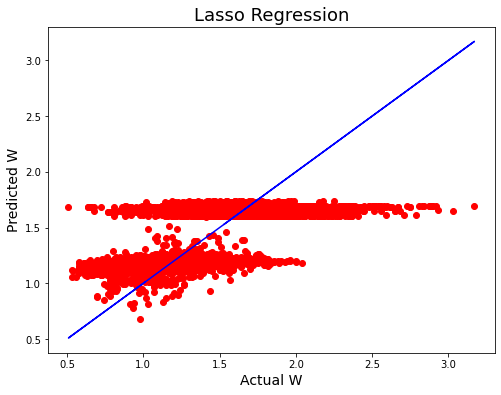

In [242]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [243]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [245]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=3)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 40.66383990711749
Cross Val Score: -8.092711498831976


In [246]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 0.2381274538834909
Mean Squared Error: 0.09619644324568052
Root Mean Square Error: 0.31015551461433105


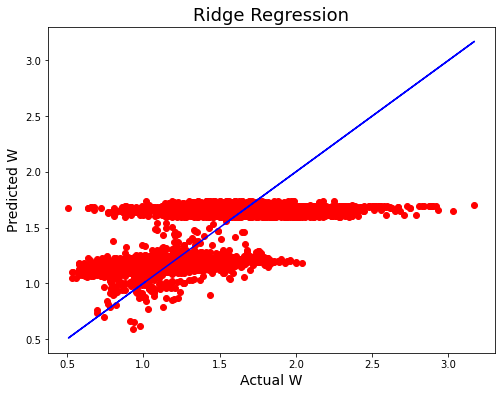

In [247]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

In [248]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'random'}


In [249]:
dt = DecisionTreeRegressor(criterion='mse', splitter='random')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 69.97389384572331
Cross Val Score: -71.4742593297037


In [250]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 0.14093972602739724
Mean Squared Error: 0.04867865753424657
Root Mean Square Error: 0.2206324036361082


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [ ]:
rf = RandomForestRegressor(criterion='mae',n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

rfs = r2_score(y_test_b,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [ ]:
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='lad',n_estimators=100)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,principal_x,y,cv=3)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [ ]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [46]:
from sklearn.svm import SVR
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 40.588283742414035
Cross Val Score: -9.901605602055215


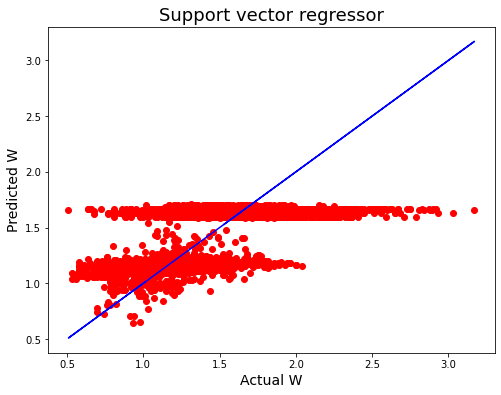

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_vector, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

In [48]:
import xgboost
print(xgboost.__version__)

1.4.2


In [49]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [51]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,x,y,cv=9)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)

R2 Score: 85.29600582190142
Cross Val Score: 42.24786832248273


In [53]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,x,y,cv=9)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)

KNR score: 0.9545146193768065
R2 Score: 84.7048687836976
Cross Val Score: -54.8950215849188


In [54]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 0.024796636986301367
Root Mean Squared error: 0.1574694795390566


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [57]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 6)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x,y,cv=9)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 49.02558584133142
Cross Val Score: 12.862680184649298


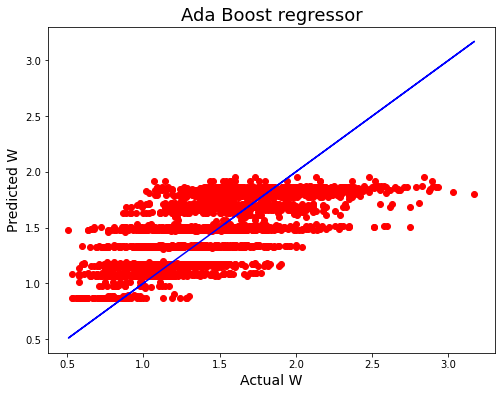

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual W',fontsize=14)
plt.ylabel('Predicted W',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

# The best model is Linear Regression. Since the difference between the percentage score of cross validation and accuracy_score is optimum

# Model Saving

In [59]:
import pickle
filename = 'inhouse_avacodo_regression.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion

In [60]:
import numpy as np
a=np.array(y_test_b)
a

array([1.53, 2.08, 1.89, ..., 1.77, 1.38, 1.01])

In [66]:
predicted=np.array(lr.predict(x_test_b))
predicted

array([1.61654015, 1.69216966, 1.68721231, ..., 1.64747181, 1.63967742,
       1.17690522])

In [67]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,1.53,1.616540
1,2.08,1.692170
2,1.89,1.687212
3,0.93,1.143437
4,2.13,1.693462
...,...,...
3645,1.30,1.096503
3646,1.27,1.691792
3647,1.77,1.647472
3648,1.38,1.639677
